In [20]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats
from MTD import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [71]:
#read data
#%run SC_dataframe.py
TS_df = pd.read_csv('../Data/TS_NuisanceReg_df.csv')
TS_df.head()

,Unnamed: 0,Time,Subject,Condition,MotorMapping,Run,FFA,PPA,RH,LH,PrimVis
0,0,1,512,FH,1,1,-0.400275,0.084878,-0.002944,0.270983,-0.021890
1,1,2,512,FH,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,3,512,FH,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,4,512,FH,1,1,-0.579103,0.311488,0.056384,0.088554,0.016725
4,4,5,512,FH,1,1,-0.051745,0.210661,0.110443,0.208945,-0.103424


In [78]:
Subjects = [503,505,508,509,510,512,513,516,517,518,519,523,527,528,529,530,531,532,534,536,537,539,540,542,546,547,549,550]
Conditions = ['FH', 'Fo', 'Fp', 'HF', 'Ho', 'Hp']
MotorMapping = [1, 2]
corr_df = pd.DataFrame(columns=['Subj', 'Condition', 'FFA-M','FFA-NM', 'PPA-M', 'PPA-NM', 'FFA-VC', 'PPA-VC'], dtype=float)
#motor mapping 1, RH-Face LH-Scene
#motor mapping 2, RH-Scene, LH-Face
i=1
for s, sub in enumerate(Subjects):
    for c, cond in enumerate(Conditions):
        for m, motormap in enumerate(MotorMapping):
            PPA_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap)]['PPA'])
            FFA_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap)]['FFA'])
            RH_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap)]['RH'])
            LH_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap)]['LH'])
            VC_ts = np.array(TS_df[(TS_df['Subject'] == sub) & (TS_df['Condition'] == cond) & (TS_df['MotorMapping'] == motormap)]['PrimVis'])
            FFA_ts[FFA_ts==0] = np.nan 
            PPA_ts[PPA_ts==0] = np.nan
            FFA_ts = np.ma.array(FFA_ts, mask=np.isnan(FFA_ts))
            PPA_ts = np.ma.array(PPA_ts, mask=np.isnan(PPA_ts))
            RH_ts[RH_ts==0] = np.nan 
            LH_ts[LH_ts==0] = np.nan
            RH_ts = np.ma.array(RH_ts, mask=np.isnan(RH_ts))
            LH_ts = np.ma.array(LH_ts, mask=np.isnan(LH_ts))
            VC_ts[VC_ts==0] = np.nan
            VC_ts = np.ma.array(VC_ts, mask=np.isnan(VC_ts))
            
            
            corr_df.loc[i, 'Condition'] = cond
            corr_df.loc[i, 'Subj'] = sub
            
            #calculate visual coupling
            corr_df.loc[i,'FFA-VC'] = np.nanmean(coupling(np.array([FFA_ts, VC_ts]).T, 10)[1][:,0,1])
            corr_df.loc[i,'PPA-VC'] = np.nanmean(coupling(np.array([PPA_ts, VC_ts]).T, 10)[1][:,0,1])
            
            ## calculate visual motor mapping
            if motormap == 1: 
                #motor mapping 1, RH-Face LH-Scene
                corr_df.loc[i,'FFA-M'] = np.nanmean(coupling(np.array([FFA_ts, RH_ts]).T, 10)[1][:,0,1])
                corr_df.loc[i,'FFA-NM'] = np.nanmean(coupling(np.array([FFA_ts, LH_ts]).T, 10)[1][:,0,1])
                corr_df.loc[i,'PPA-M'] = np.nanmean(coupling(np.array([PPA_ts, LH_ts]).T, 10)[1][:,0,1])
                corr_df.loc[i,'PPA-NM'] = np.nanmean(coupling(np.array([PPA_ts, RH_ts]).T, 10)[1][:,0,1])
            if motormap == 2:
                #motor mapping 2, RH-Scene, LH-Face
                corr_df.loc[i,'FFA-M'] = np.nanmean(coupling(np.array([FFA_ts, LH_ts]).T, 10)[1][:,0,1])
                corr_df.loc[i,'FFA-NM'] = np.nanmean(coupling(np.array([FFA_ts, RH_ts]).T, 10)[1][:,0,1])
                corr_df.loc[i,'PPA-M'] = np.nanmean(coupling(np.array([PPA_ts, RH_ts]).T, 10)[1][:,0,1])
                corr_df.loc[i,'PPA-NM'] = np.nanmean(coupling(np.array([PPA_ts, LH_ts]).T, 10)[1][:,0,1])
            i = i+1

In [80]:
#corr_df.groupby('Condition').mean()

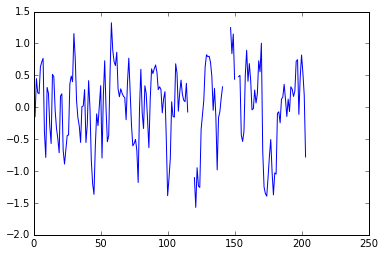

In [77]:
plt.plot(FFA_ts)